In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# 读取CSV文件
df1 = pd.read_csv('/content/drive/My Drive/SamplePoints_2019_2023.csv')

filtered_df = df1[(df1['sadImg'] > 0.992) & (df1['edImg'] < 0.01)]

# 3. 查看结果
print(filtered_df.head())
print(f"筛选后样本数量：{len(filtered_df)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  system:index  b1      blue     edImg     green   latitude   longitude  \
0          0_0   1  0.089179  0.001623  0.125794  35.941011  105.010856   
1          1_0   1  0.061579  0.002504  0.092502  34.925555  109.757194   
2          2_0   1  0.085137  0.000639  0.124934  35.463197  104.144970   
4          4_0   1  0.070825  0.001973  0.101384  34.843090  109.734287   
5          5_0   1  0.118951  0.003394  0.154983  35.530301  104.324453   

        nir       red    sadImg     swir1     swir2  \
0  0.259477  0.149395  0.997789  0.245709  0.195285   
1  0.294717  0.098566  0.998060  0.198327  0.132709   
2  0.256014  0.145364  0.998788  0.255912  0.216383   
4  0.277068  0.109419  0.999110  0.233696  0.168365   
5  0.266864  0.177315  0.998247  0.239084  0.190762   

                                                .geo  
0  {"geodesic":false,"type":"Point

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Calculate the average over ten trials
print(filtered_df.columns.tolist())
X = filtered_df[['blue','green','red','nir','swir1','swir2']]
y = filtered_df['b1']
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    cohen_kappa_score
)
# -----------------------------
# 3. 划分训练与测试集
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# 4. 训练随机森林模型
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=100,        # 树数量
    max_depth=None,          # 不限制深度
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("✅ 模型训练完成")
kappa = cohen_kappa_score(y_test, y_pred)
# -----------------------------
# 5. 模型预测与评估
# -----------------------------
print("\n✅ 模型准确率：", accuracy_score(y_test, y_pred))
print("\n分类报告：\n", classification_report(y_test, y_pred))
print("\n混淆矩阵：\n", confusion_matrix(y_test, y_pred))
print(f"Kappa:             {kappa:.4f}")

['system:index', 'b1', 'blue', 'edImg', 'green', 'latitude', 'longitude', 'nir', 'red', 'sadImg', 'swir1', 'swir2', '.geo']
✅ 模型训练完成

✅ 模型准确率： 0.8390470656595003

分类报告：
               precision    recall  f1-score   support

           1       0.74      0.76      0.75       235
           2       0.86      0.83      0.84       241
           3       0.79      0.78      0.79       253
           4       0.84      0.81      0.82       251
           5       0.97      0.99      0.98       214
           7       0.90      0.94      0.92       272
           8       0.78      0.77      0.78       255

    accuracy                           0.84      1721
   macro avg       0.84      0.84      0.84      1721
weighted avg       0.84      0.84      0.84      1721


混淆矩阵：
 [[178   0  12  10   0   2  33]
 [  4 201  31   5   0   0   0]
 [ 19  31 197   6   0   0   0]
 [  4   3   8 204   0  17  15]
 [  0   0   0   1 211   0   2]
 [  0   0   0   7   5 256   4]
 [ 37   0   0  11   1   9 197]]
Kappa: 

In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
# 如果你的列名不同，比如 'lon', 'lat'，请改成对应列名
lon_col = 'longitude'
lat_col = 'latitude'

if lon_col not in filtered_df.columns or lat_col not in filtered_df.columns:
    raise ValueError("⚠️ CSV文件中没有找到 'longitude' 和 'latitude' 列，请检查列名！")

# 4. 转换为 GeoDataFrame（每个样本点都有空间坐标）
gdf = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df[lon_col], filtered_df[lat_col]),
    crs="EPSG:4326"  # WGS84坐标系，GEE要求此坐标系
)

# 5. 只保留 class 属性和几何信息（如果你只想保留这些字段）
gdf_export = gdf[['b1', 'geometry']]

# 6. 导出为 shapefile（四个文件：.shp/.shx/.dbf/.prj）
output_path = "filtered_points.shp"
gdf_export.to_file(output_path, driver='ESRI Shapefile', encoding='utf-8')

print("✅ 成功导出！文件路径：", output_path)
print("✔️ 可在 GEE 中 Assets → NEW → Table → 上传 filtered_points.shp（及其配套文件）")
import shutil

# 压缩为 ZIP 文件（GEE 上传时更方便）
shutil.make_archive('/content/filtered_points', 'zip', '/content', 'filtered_points.shp')

from google.colab import files
files.download('/content/filtered_points.zip')


✅ 成功导出！文件路径： filtered_points.shp
✔️ 可在 GEE 中 Assets → NEW → Table → 上传 filtered_points.shp（及其配套文件）


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==========================================================
# ✅ 将筛选结果导出为 shapefile 并下载（包含 class 属性）
# ==========================================================

import geopandas as gpd
import os
import shutil
from google.colab import files
filtered_df = filtered_df[['b1', 'longitude', 'latitude']]
# 假设 df_filtered 已经存在，包含 'longitude', 'latitude', 'class' 等列
print("样例数据：")
print(filtered_df.head())

# ==========================================================
# 1. 将 DataFrame 转为 GeoDataFrame
# ==========================================================
gdf_export = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(gpd.points_from_xy(df_simple.longitude, df_simple.latitude)),
    crs="EPSG:4326"
)

# ==========================================================
# 2. 保存为 Shapefile
# ==========================================================
out_dir = "/content/shapefile_export"
os.makedirs(out_dir, exist_ok=True)

output_path = os.path.join(out_dir, "filtered_points.shp")
gdf_export.to_file(output_path, driver="ESRI Shapefile")

print("\n✅ 导出的 shapefile 文件列表：")
for f in os.listdir(out_dir):
    print(" -", f)

# ==========================================================
# 3. 仅打包该目录下的 shapefile 文件
# ==========================================================
zip_path = "/content/filtered_points.zip"
shutil.make_archive('/content/filtered_points', 'zip', out_dir)

# ==========================================================
# 4. 下载 ZIP 文件（包含 .shp, .shx, .dbf, .prj 等）
# ==========================================================
print("\n📦 打包完成，开始下载...")
files.download(zip_path)
print("✅ 下载完成！可直接上传到 GEE。")


样例数据：
   b1   longitude   latitude
0   1  105.010856  35.941011
1   1  109.757194  34.925555
2   1  104.144970  35.463197
4   1  109.734287  34.843090
5   1  104.324453  35.530301

✅ 导出的 shapefile 文件列表：
 - filtered_points.shp
 - filtered_points.prj
 - filtered_points.cpg
 - filtered_points.shx
 - filtered_points.dbf

📦 打包完成，开始下载...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 下载完成！可直接上传到 GEE。


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import zipfile, os

# === 1. 仅保留 class、longitude、latitude 三列 ===
df_simple = filtered_df[['b1', 'longitude', 'latitude']].copy()

# 检查列名，确保没有保留关键字
df_simple.columns = ['b1', 'longitude', 'latitude']

# === 2. 创建 GeoDataFrame ===
gdf = gpd.GeoDataFrame(
    df_simple,
    geometry=gpd.points_from_xy(df_simple.longitude, df_simple.latitude),
    crs="EPSG:4326"
)

# === 3. 去掉索引和保留干净字段 ===
# 注意：GEE 不允许上传 geometry 名称以外的隐藏列
gdf = gdf[['b1', 'geometry']].copy()

# === 4. 保存为 Shapefile ===
output_dir = '/content/filtered_points_shp'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'filtered_points.shp')

gdf.to_file(output_path, driver='ESRI Shapefile', index=False)

# === 5. 打包为 zip 文件 ===
shp_zip = '/content/filtered_points.zip'
with zipfile.ZipFile(shp_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            zipf.write(os.path.join(root, file),
                       arcname=os.path.relpath(os.path.join(root, file), output_dir))

print("✅ Shapefile 已导出成功！")
print("📂 文件路径:", shp_zip)
print("请在左侧文件栏中右键下载 filtered_points.zip 进行上传。")
from google.colab import files

# 显示生成的文件
!ls -lh /content/

# 如果要直接下载 ZIP 文件
files.download("/content/filtered_points.zip")


✅ Shapefile 已导出成功！
📂 文件路径: /content/filtered_points.zip
请在左侧文件栏中右键下载 filtered_points.zip 进行上传。
total 2.7M
drwx------ 5 root root 4.0K Oct 28 12:03 drive
-rw-r--r-- 1 root root    5 Oct 28 12:14 filtered_points.cpg
-rw-r--r-- 1 root root 2.4M Oct 28 12:14 filtered_points.dbf
-rw-r--r-- 1 root root  145 Oct 28 12:14 filtered_points.prj
-rw-r--r-- 1 root root 157K Oct 28 12:14 filtered_points.shp
drwxr-xr-x 2 root root 4.0K Oct 28 12:42 filtered_points_shp
-rw-r--r-- 1 root root  45K Oct 28 12:14 filtered_points.shx
-rw-r--r-- 1 root root 110K Oct 28 12:42 filtered_points.zip
drwxr-xr-x 1 root root 4.0K Oct 24 13:37 sample_data
drwxr-xr-x 2 root root 4.0K Oct 28 12:25 shapefile_export


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =====================================
# ✅ 在 Colab 中安装 Times New Roman 字体
# =====================================
!apt-get install -y msttcorefonts -qq > /dev/null

import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置全局字体为 Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

print("✅ Times New Roman 字体已启用。")


✅ Times New Roman 字体已启用。


             system:index      Ampl      B11      B12       B2      B3  \
0  00000000000000000000_0  0.110653  0.31440  0.27315  0.11680  0.1618   
1  00000000000000000001_0  0.157419  0.24550  0.20290  0.08900  0.1176   
2  00000000000000000002_0  0.141582  0.30115  0.30015  0.11210  0.1580   
3  00000000000000000003_0  0.150438  0.22810  0.17470  0.07340  0.0952   
4  00000000000000000004_0  0.071270  0.28885  0.26285  0.11625  0.1547   

       B4       B5       B6       B7  ...       RVI   R_deriv      SAVI  \
0  0.2034  0.19710  0.21535  0.23400  ...  1.362340  0.063366  0.112749   
1  0.1382  0.18340  0.26010  0.28690  ...  2.104197  0.275540  0.246394   
2  0.2091  0.22075  0.24785  0.26100  ...  1.290292 -0.283165  0.093013   
3  0.0848  0.15840  0.24880  0.30120  ...  3.764151  0.552252  0.388938   
4  0.1903  0.20950  0.24070  0.25285  ...  1.306621  0.142541  0.093216   

   SOS_time  Start_val         VH         VV        WI  b1  \
0       6.0   0.194106 -22.734130  -8.7023

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📤 已导出 randomforest_feature_metrics.csv


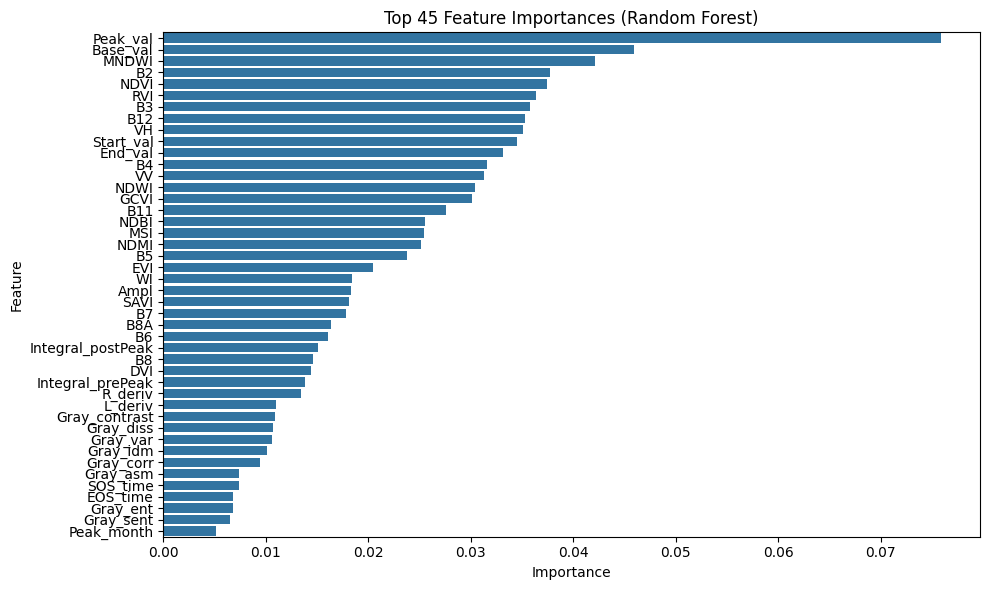

In [12]:
# ===============================
# 1. 导入依赖库
# ===============================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from google.colab import files
# ===============================
# 2. 上传并读取 CSV 文件
# ===============================


df = pd.read_csv('/content/drive/My Drive/Sample_Features_2023117.csv')
print(df.head())

# ===============================
# 3. 指定类别列并分离特征与标签
# ===============================
# ⚠️ 修改这里的 'class' 为你的类别列名
label_col = 'b1'

X = df.drop(columns=['b1','system:index','.geo','NDVIthr','NDVImax','L_integral'])
y = df[label_col]

# ===============================
# 4. 划分训练集与测试集
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 5. 训练随机森林模型
# ===============================
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

print("✅ 随机森林模型训练完成")

# 6. 特征重要性计算
# ===============================
importances = rf.feature_importances_
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

# ===============================
# 7. 多指标精度分析
# ===============================
metrics_list = []
feature_counts = range(1, len(fi_df)+1)

for k in feature_counts:
    selected_features = fi_df['Feature'].iloc[:k].tolist()
    rf_k = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
    rf_k.fit(X_train[selected_features], y_train)
    y_pred = rf_k.predict(X_test[selected_features])

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    kappa = cohen_kappa_score(y_test, y_pred)

    metrics_list.append({
        'Feature_Count': k,
        'Accuracy': acc,
        'Precision': pre,
        'Recall': rec,
        'F1_Score': f1,
        'Kappa': kappa
    })

# 转换为 DataFrame
metrics_df = pd.DataFrame(metrics_list)



# ===============================
# 9. 保存精度指标结果
# ===============================
metrics_df.to_csv('randomforest_feature_metrics.csv', index=False)
files.download('randomforest_feature_metrics.csv')
print("📤 已导出 randomforest_feature_metrics.csv")

# ===============================
# 10. 可视化特征重要性（Top 45）
# ===============================
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(44))
plt.title('Top 45 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()




In [13]:
# ===============================
# 7. 多指标精度分析 + 袋外误差(OOB Error)
# ===============================
metrics_list = []
feature_counts = range(1, len(fi_df)+1)

for k in feature_counts:
    selected_features = fi_df['Feature'].iloc[:k].tolist()
    rf_k = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        oob_score=True  # ✅ 启用袋外估计
    )
    rf_k.fit(X_train[selected_features], y_train)

    # 袋外分数与误差
    oob_score = rf_k.oob_score_
    oob_error = 1 - oob_score

    # 测试集预测精度
    y_pred = rf_k.predict(X_test[selected_features])

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    kappa = cohen_kappa_score(y_test, y_pred)

    metrics_list.append({
        'Feature_Count': k,
        'Accuracy': acc,
        'Precision': pre,
        'Recall': rec,
        'F1_Score': f1,
        'Kappa': kappa,
        'OOB_Score': oob_score,
        'OOB_Error': oob_error
    })

# 转换为 DataFrame
metrics_df = pd.DataFrame(metrics_list)



# ===============================
# 9. 保存精度指标结果（包含袋外误差）
# ===============================
metrics_df.to_csv('randomforest_feature_oob_metrics.csv', index=False)
files.download('randomforest_feature_oob_metrics.csv')
print("📤 已导出 randomforest_feature_oob_metrics.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📤 已导出 randomforest_feature_oob_metrics.csv


In [ ]:
# 导出并下载特征重要性排序
fi_df.to_csv('feature_importance_randomforest.csv', index=False)
files.download('feature_importance_randomforest.csv')
print("📤 已导出 feature_importance_randomforest.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📤 已导出 feature_importance_randomforest.csv


In [ ]:
# ===============================
# 1. 导入依赖库
# ===============================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/My Drive/Sample_Features_2023.csv')
X = df[['Peak_val','Base_val','B2','MNDWI','NDVI','RVI','End_val','B12','VH','B3','B4','VV','Start_val','B11','NDWI',]]
y = df['b1']
# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林模型
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 字体路径
font_path = '/content/drive/My Drive/TIMES.TTF'

# 注册字体
fm.fontManager.addfont(font_path)

# 设置 Matplotlib 全局字体
plt.rcParams['font.family'] = 'Times New Roman'



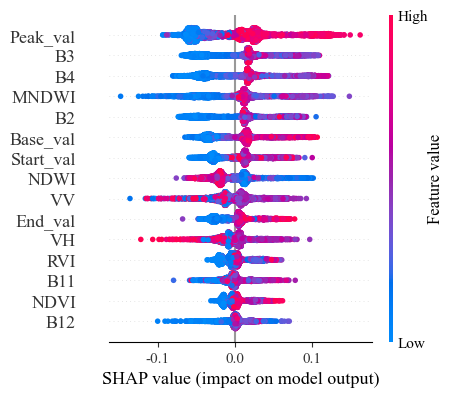

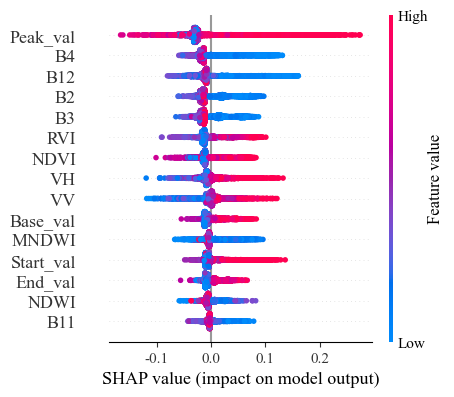

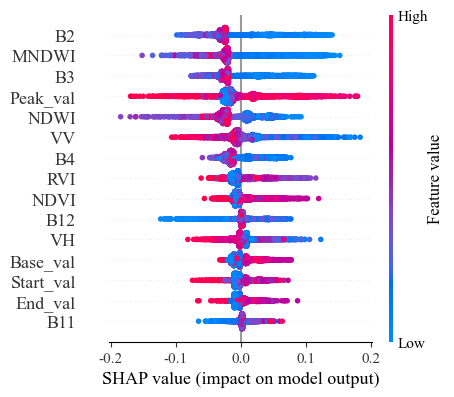

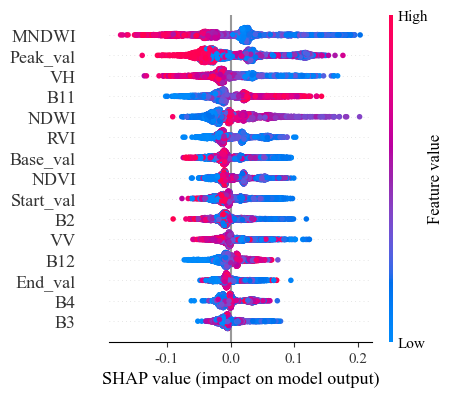

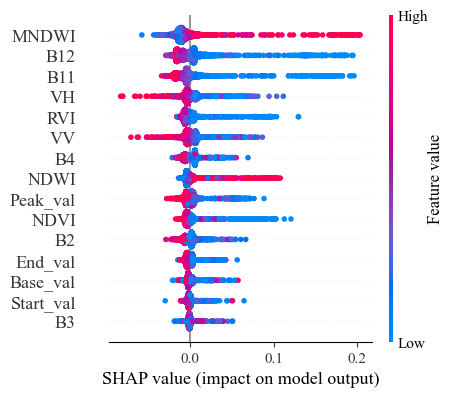

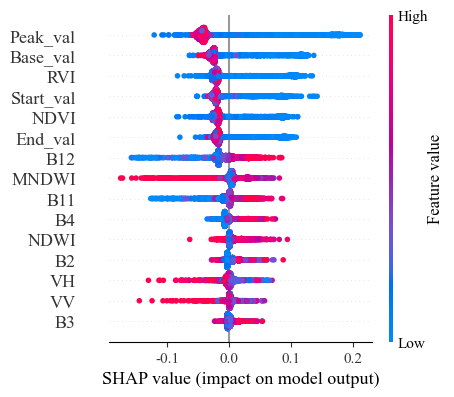

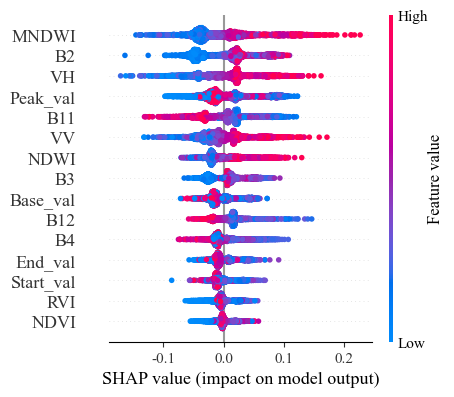

/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. tight_layout cannot make Axes w

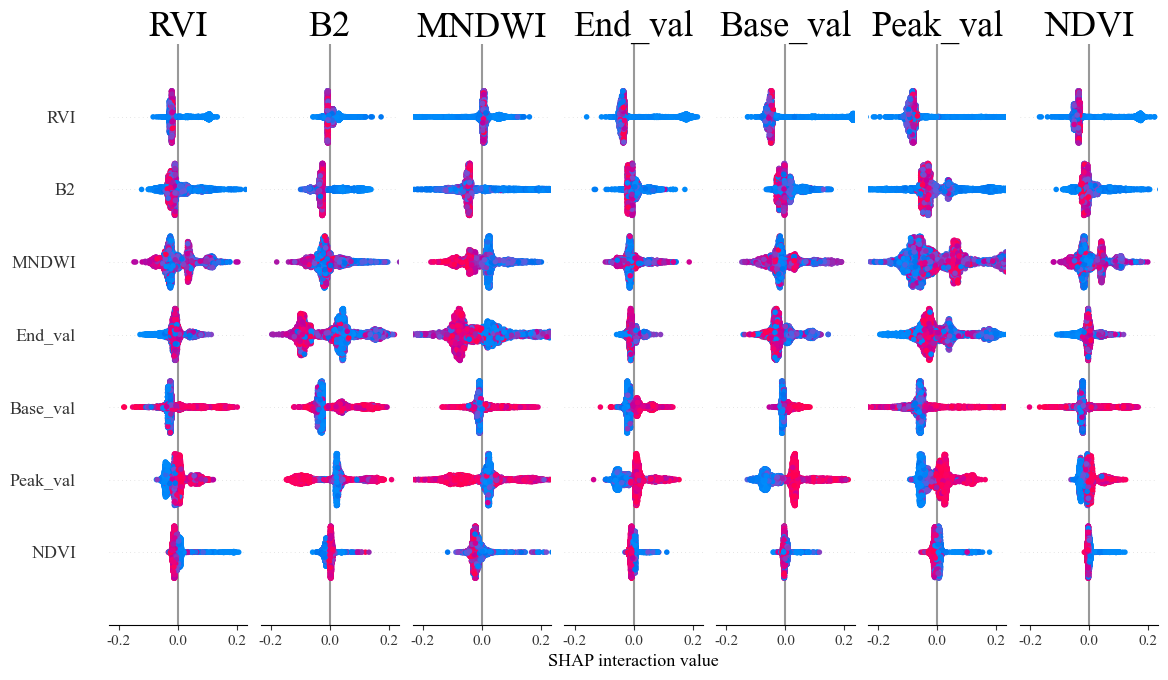

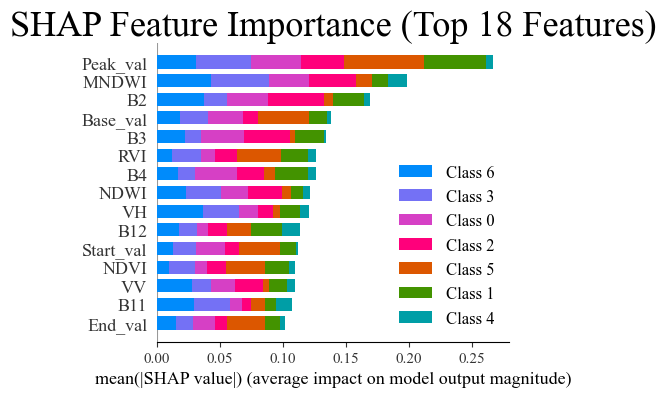

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_model)
# 计算测试集的shap值
shap_values = explainer.shap_values(X_train)
plt.rcParams.update({
    'font.family': 'Times New Roman',   # 使用 Times New Roman
    'font.size': 124,                    # 默认字体大小
    'axes.titlesize': 26,               # 图标题字体大小
    'axes.labelsize': 124,               # 坐标轴标签字体大小
    'xtick.labelsize': 122,              # X 轴刻度
    'ytick.labelsize': 122,              # Y 轴刻度
    'legend.fontsize': 122,              # 图例字体
    'figure.titlesize': 26              # 全局标题
})
# 比如绘制第 0 类（类别索引为 0）
shap.summary_plot(shap_values[:, :, 0], X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values[:, :, 1], X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values[:, :, 2], X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values[:, :, 3], X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values[:, :, 4], X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values[:, :, 5], X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values[:, :, 6], X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns,max_display=len(X_train.columns))
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Top 18 Features)")
plt.tight_layout()
plt.show()


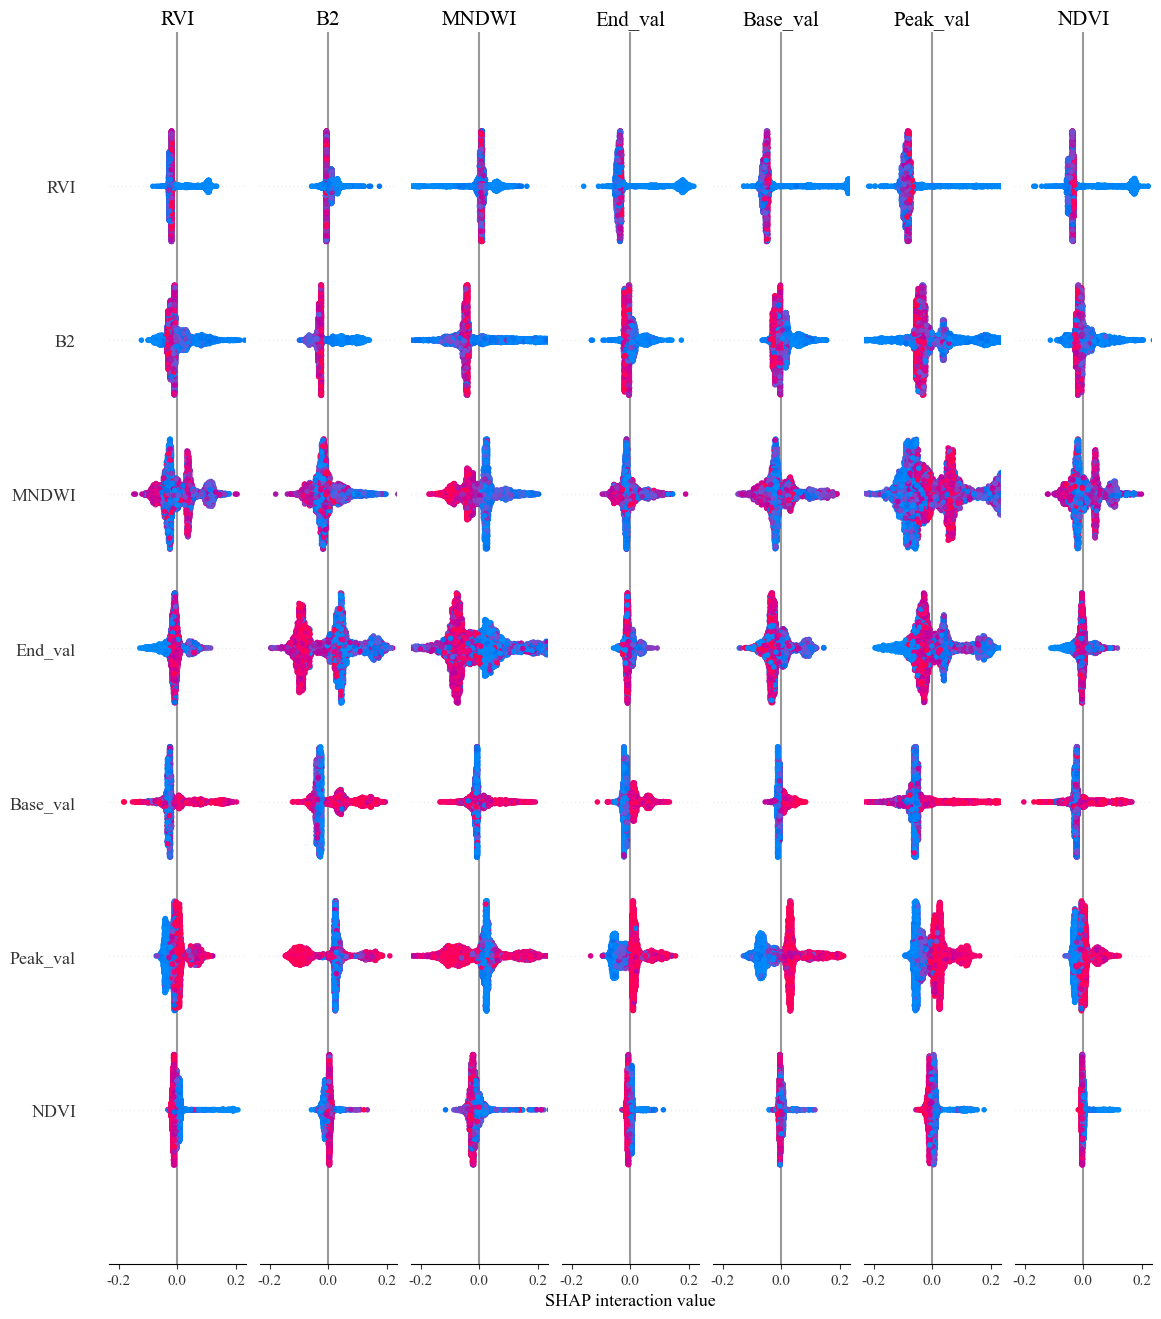

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns,max_display=len(X_train.columns))

In [ ]:
import shap
import matplotlib.pyplot as plt
import os

# 假设 shap_values 是一个形状为 [n_samples, n_features, n_classes] 的三维数组
# X_train 是你的特征数据 DataFrame
# 这里以 7 个类别为例
num_classes = shap_values.shape[2]

# 创建保存路径（可选）
os.makedirs("shap_plots", exist_ok=True)

# 循环绘制每个类别的 SHAP summary 图
for i in range(num_classes):
    plt.figure(figsize=(7, 7))
    shap.summary_plot(
        shap_values[:, :, i],
        X_train,
        feature_names=X_train.columns,
        show=False  # 不立即展示
    )
    plt.title(f"SHAP Feature Impact for Class {i}", fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.tight_layout()
    plt.savefig(f"shap_plots/SHAP_Class{i}.png", dpi=300, bbox_inches='tight')
    plt.close()


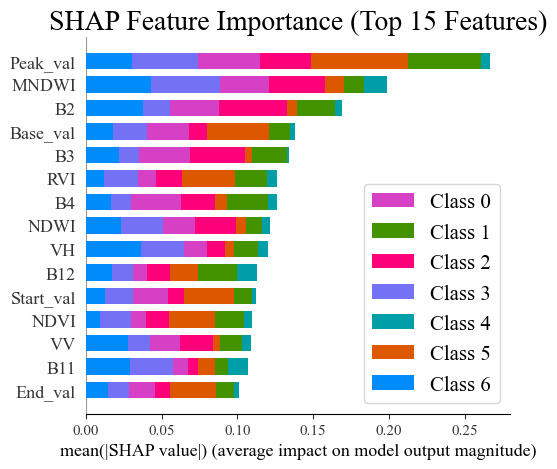

In [ ]:
import shap
import matplotlib.pyplot as plt
import shap

plt.rcParams.update({
    'font.family': 'Times New Roman',   # 使用 Times New Roman
    'font.size': 100,                    # 默认字体大小
    'axes.titlesize': 20,               # 图标题字体大小
    'axes.labelsize': 100,               # 坐标轴标签字体大小
    'xtick.labelsize': 100,              # X 轴刻度
    'ytick.labelsize': 100,              # Y 轴刻度
    'legend.fontsize': 15,              # 图例字体
    'figure.titlesize': 5              # 全局标题
})
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.title("")

# 获取当前图例
handles, labels = plt.gca().get_legend_handles_labels()

# 自定义 legend 排序 (例如按 Class 1–7)
order = sorted(range(len(labels)), key=lambda i: int(labels[i].split()[-1]))  # 自动按数字排序
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.title("SHAP Feature Importance (Top 15 Features)")
plt.tight_layout()
plt.show()

